**Imports**

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import scipy
from scipy.optimize import curve_fit
import os

**Get the Data**

Load in the Date Files

In [224]:
base_dir = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\Cosmic Watch\\'

dir_data_base = base_dir + '\\Data\\11-9-2021'
dir_data_angle_kat = base_dir + '\\Data\\11-18-2021\\Katherine Johnson'
dir_data_angle_tsung = base_dir + '\\Data\\11-18-2021\\TsungDaoLee'

dir_plot = base_dir + '\\Paper and Presentation'

In [225]:
# function to get time and count data
def get_counts(path):
    f = open(path, 'r')
    lines = f.readlines()
    
    # get the times and coincidence counts
    times = []
    counts = []

    for line in lines[7:]:
        text = line.split()

        time = text[1]
        count = float(text[10])

        times.append(time)
        counts.append(count)
        
        # reformat the times
        stamps = []

        for time in times:
            minute = float(time[2:4])-float(times[0][2:4])
            second = float(time[5:7])-float(times[0][5:7])
            hour = float(time[0:1])-float(times[0][0:1])

            newtime = 3600*hour + 60*minute + second

            stamps.append(newtime)
    return stamps, counts

In [226]:
# baseline data
os.chdir(dir_data_base)

path0 = os.listdir()[0]

stamps0, nums0 = get_counts(path0)
times0, counts0 = stamps0[:2313], nums0[:2313]

In [86]:
# katherine johnson data
os.chdir(dir_data_angle_kat)

path10 = os.listdir()[0]
path20 = os.listdir()[1]
path30 = os.listdir()[2]
path40 = os.listdir()[3]
path50 = os.listdir()[4]
path60 = os.listdir()[5]

stamps10, nums10 = get_counts(path10)
times10, counts10 = stamps10[:2279], nums10[:2279]
times20, counts20 = get_counts(path20)
times30, counts30 = get_counts(path30)
times40, counts40 = get_counts(path40)
times50, counts50 = get_counts(path50)
times60, counts60 = get_counts(path60)

In [227]:
# tsung dao lee data
os.chdir(dir_data_angle_tsung)

path10 = os.listdir()[0]
path20 = os.listdir()[1]
path30 = os.listdir()[2]
path40 = os.listdir()[3]
path50 = os.listdir()[4]
path60 = os.listdir()[5]

stamps10_2, nums10_2 = get_counts(path10)
times10_2, counts10_2 = stamps10_2[:2279], nums10_2[:2279]
times20_2, counts20_2 = get_counts(path20)
times30_2, counts30_2 = get_counts(path30)
times40_2, counts40_2 = get_counts(path40)
times50_2, counts50_2 = get_counts(path50)
times60_2, counts60_2 = get_counts(path60)

In [87]:
# function to get poisson error bars for the count data
def poisson_errs(counts):
    n = counts
    N = np.sum(counts)
    return np.sqrt(n*(1-n/N))

In [88]:
# poisson count errors
errs0 = poisson_errs(counts0)
errs10 = poisson_errs(counts10)
errs20 = poisson_errs(counts20)
errs30 = poisson_errs(counts30)
errs40 = poisson_errs(counts40)
errs50 = poisson_errs(counts50)
errs60 = poisson_errs(counts60)

**Plot the Cumulative Counts over Time for Each Angle**

In [89]:
# plot parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

Cumulative Counts 0 Degrees

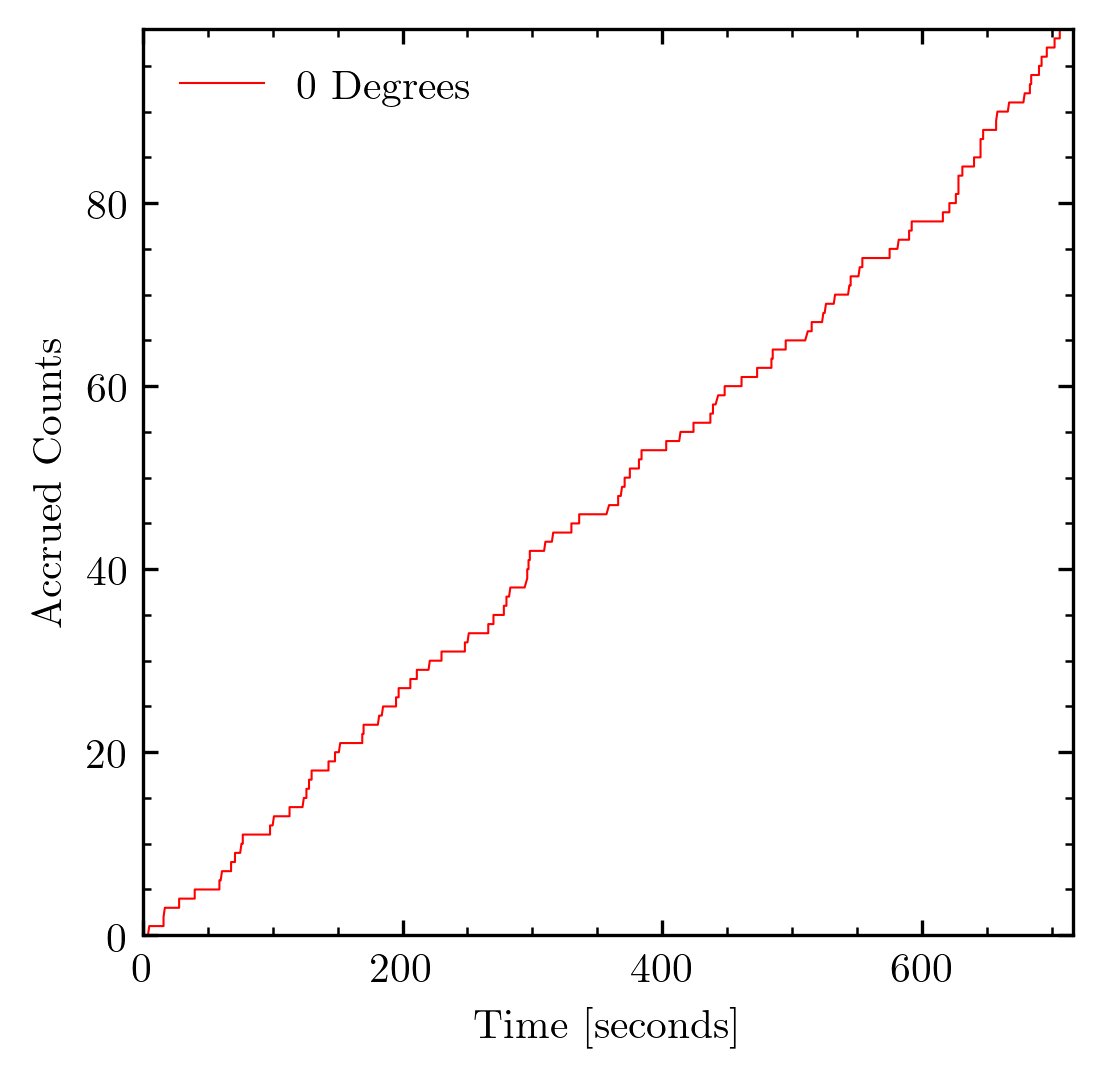

In [257]:
# 0 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,max(times0)), 
                         ylim=(0,max(np.cumsum(counts0))), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times0, np.cumsum(counts0), ls='-', lw=0.5, label='0 Degrees', color='red')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_0.png')

Cumulative Counts 10 Degrees

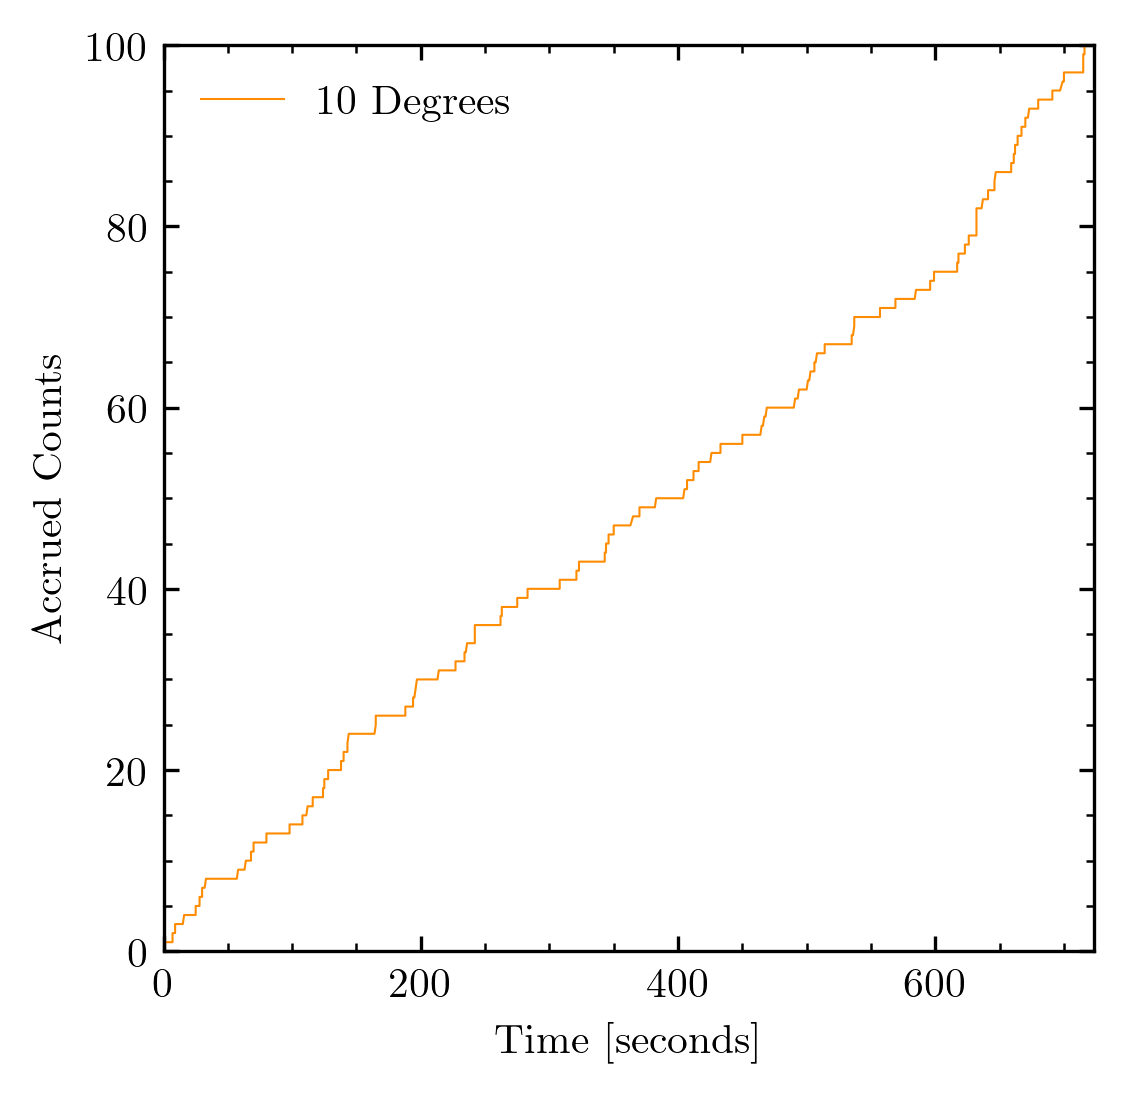

In [284]:
# 10 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,max(times10)), 
                         ylim=(0,max(np.cumsum(counts10))), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times10, np.cumsum(counts10), ls='-', lw=0.5, label='10 Degrees', color='darkorange')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_10.png')

Cumulative Counts 20 Degrees

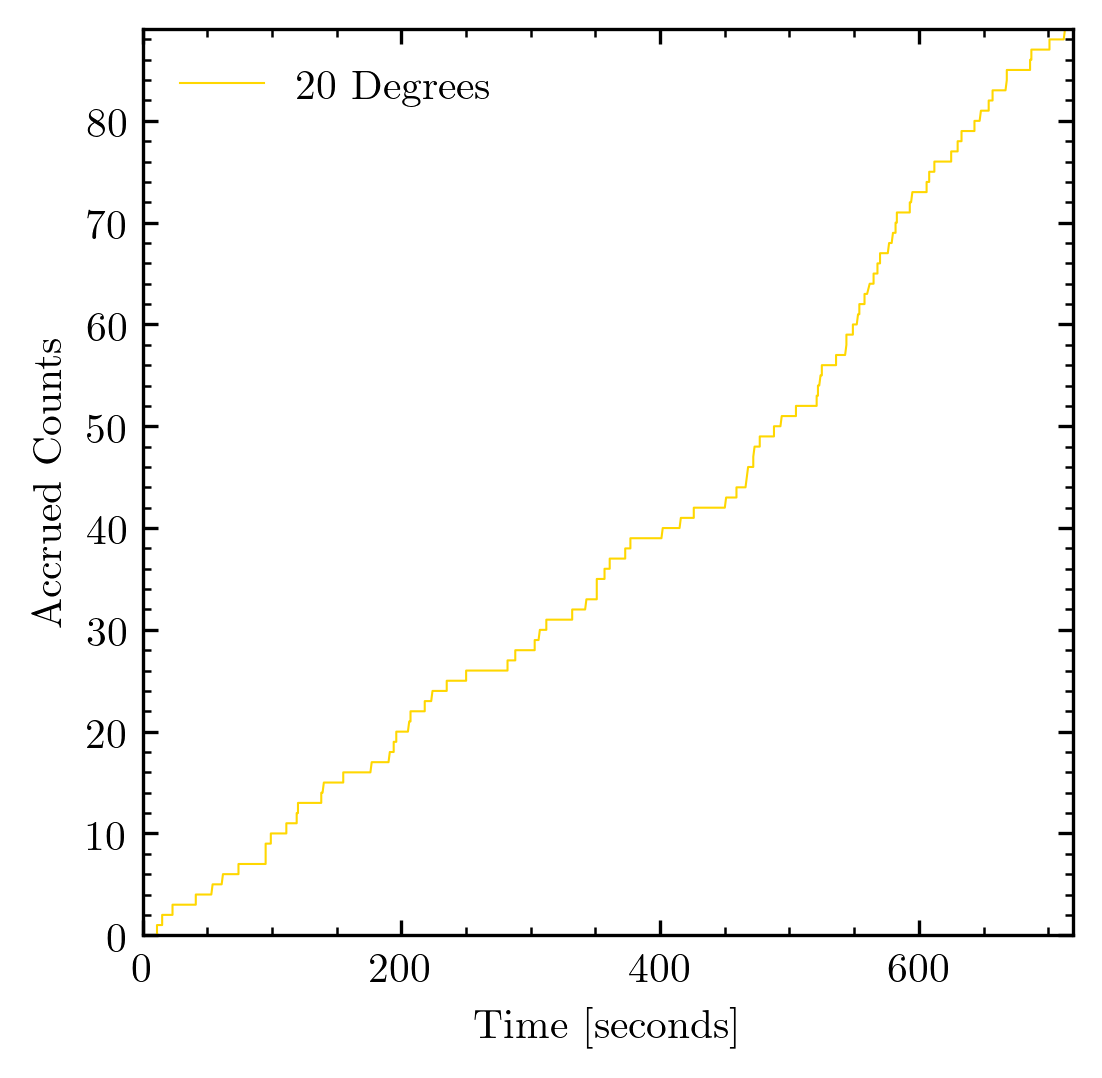

In [259]:
# 20 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,max(times20)), 
                         ylim=(0,max(np.cumsum(counts20))), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times20, np.cumsum(counts20), ls='-', lw=0.5, label='20 Degrees', color='gold')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_20.png')

Cumulative Counts 30 degrees

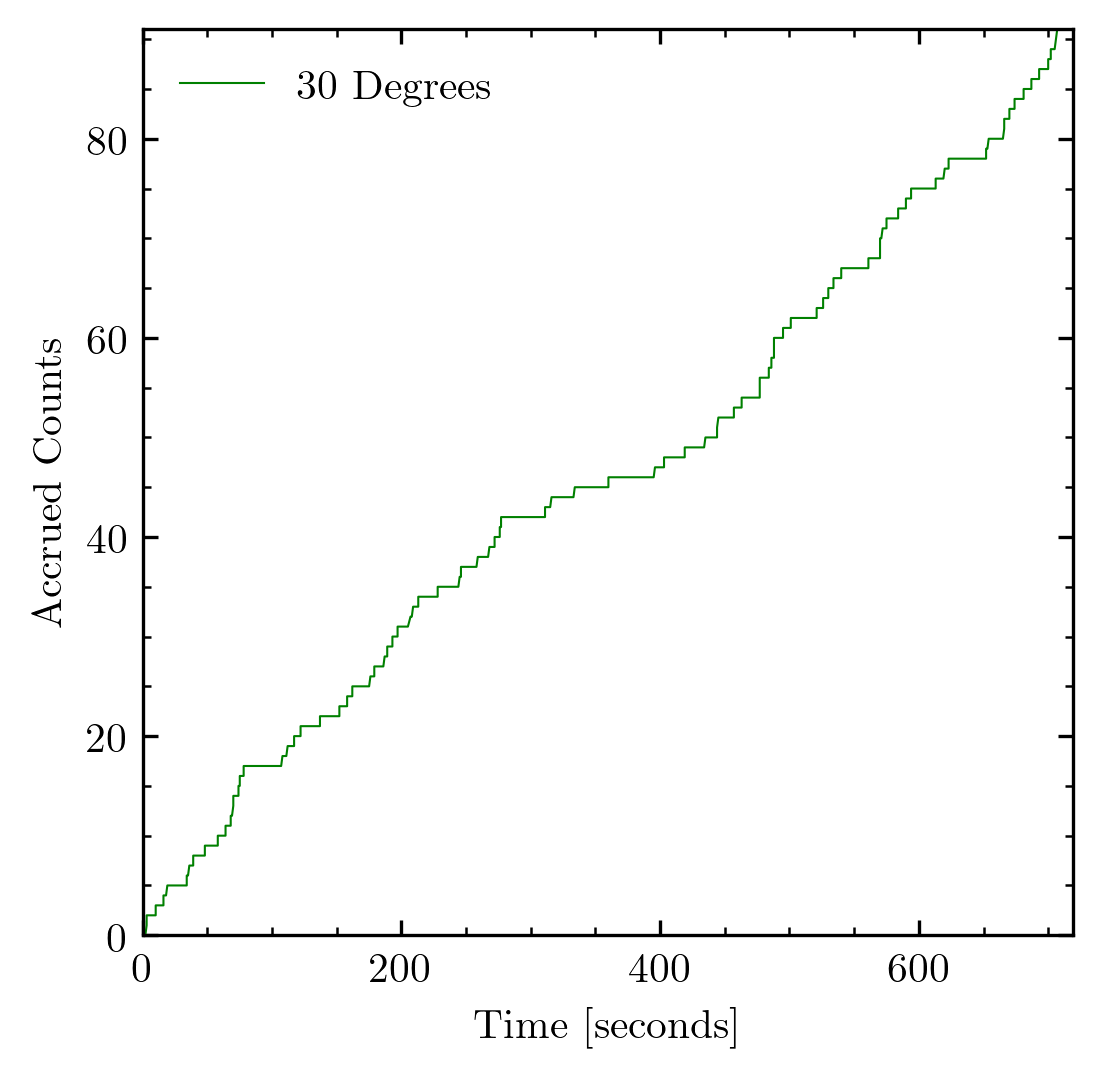

In [260]:
# 30 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,max(times30)), 
                         ylim=(0,max(np.cumsum(counts30))), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times30, np.cumsum(counts30), ls='-', lw=0.5, label='30 Degrees', color='green')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_30.png')

Cumulative counts 40 degrees

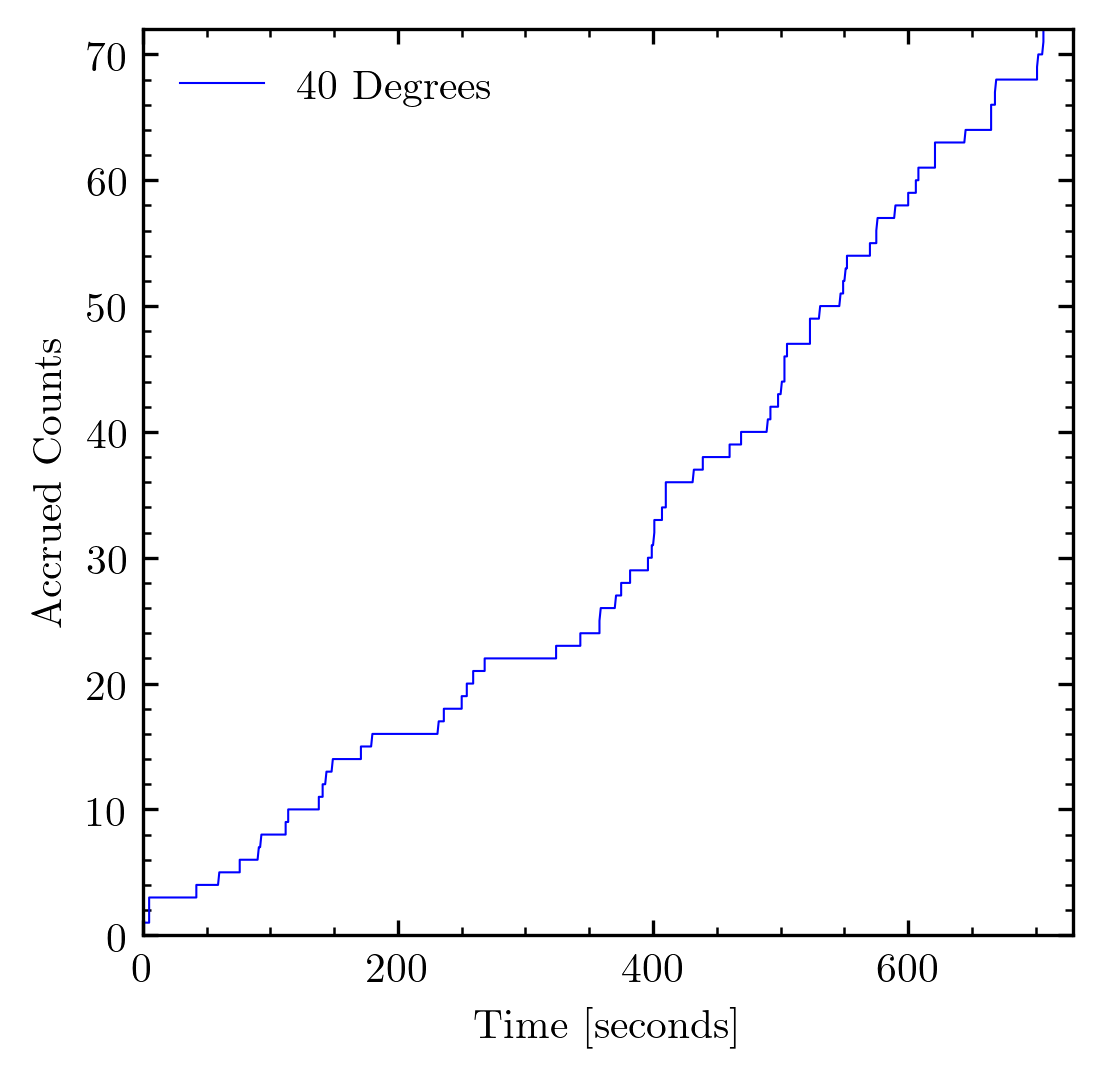

In [261]:
# 40 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,max(times40)), 
                         ylim=(0,max(np.cumsum(counts40))), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times40, np.cumsum(counts40), ls='-', lw=0.5, label='40 Degrees', color='blue')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_40.png')

Cumulative Counts 50 degrees

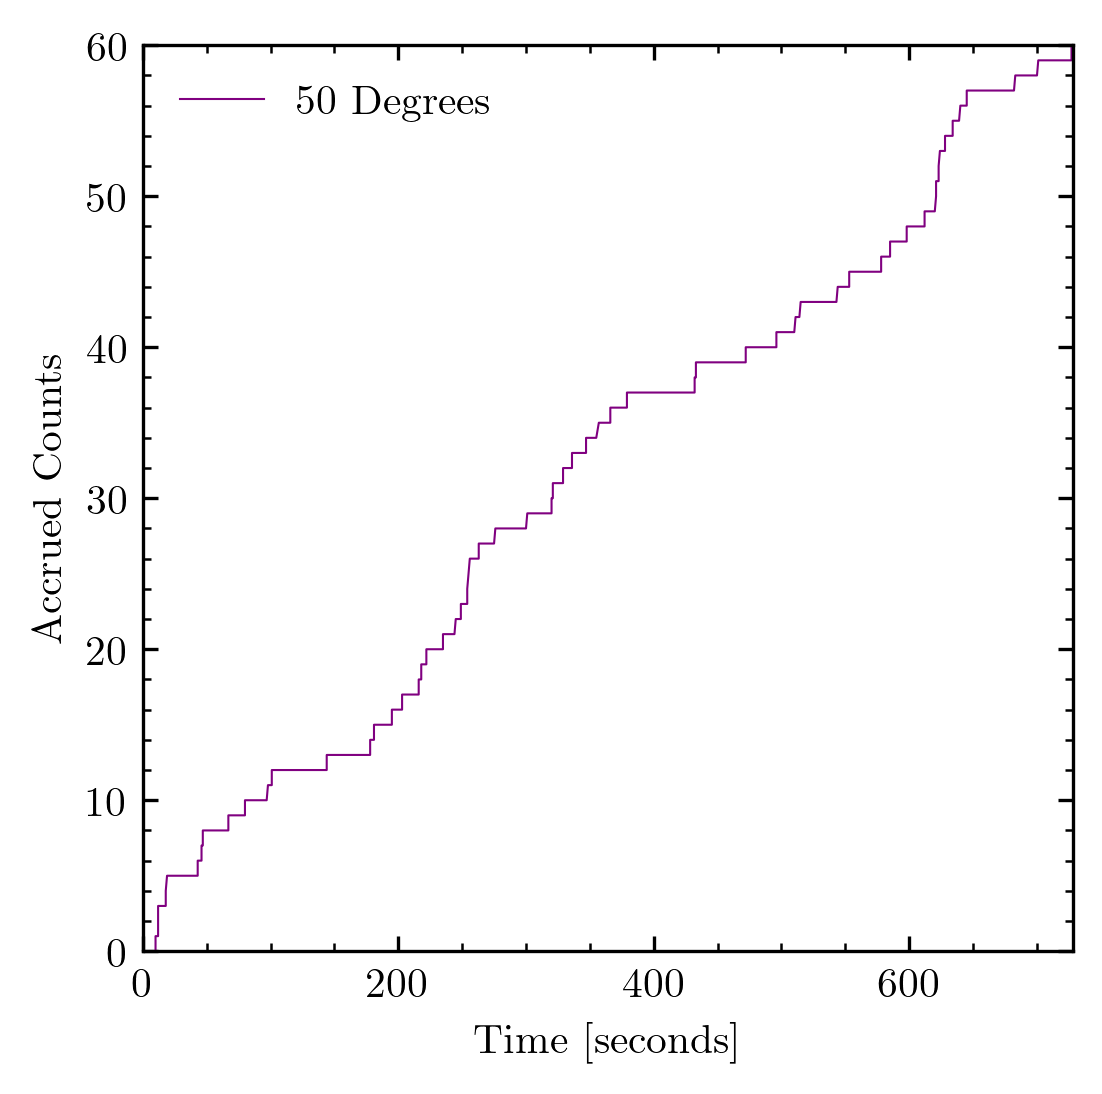

In [262]:
# 50 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,max(times50)), 
                         ylim=(0,max(np.cumsum(counts50))), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times50, np.cumsum(counts50), ls='-', lw=0.5, label='50 Degrees', color='purple')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_50.png')

Cumulative counts 60 degrees

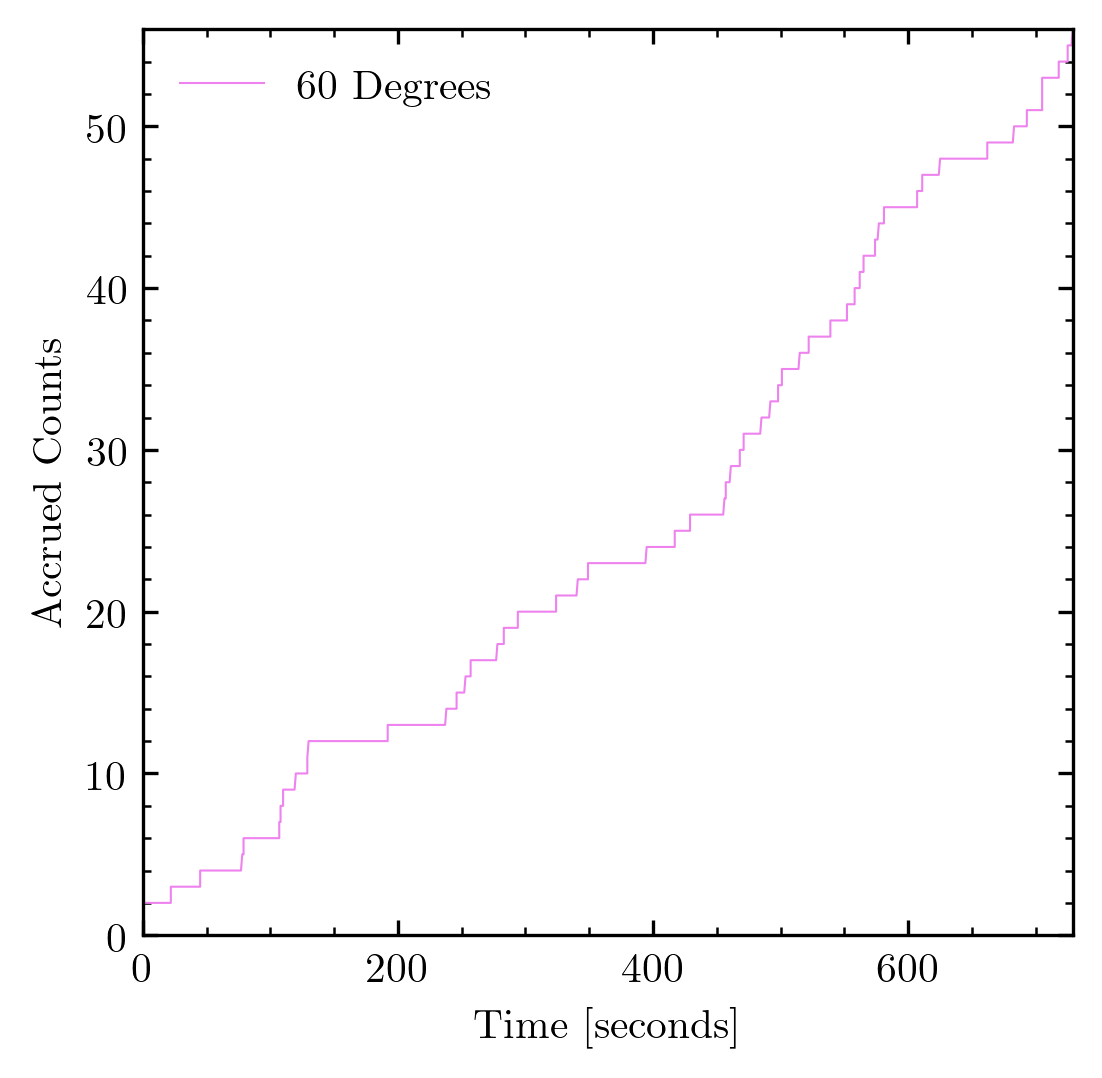

In [263]:
# 60 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,max(times60)), 
                         ylim=(0,max(np.cumsum(counts60))), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times60, np.cumsum(counts60), ls='-', lw=0.5, label='60 Degrees', color='violet')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_60.png')

Plot all of the Cumulative Counts Together

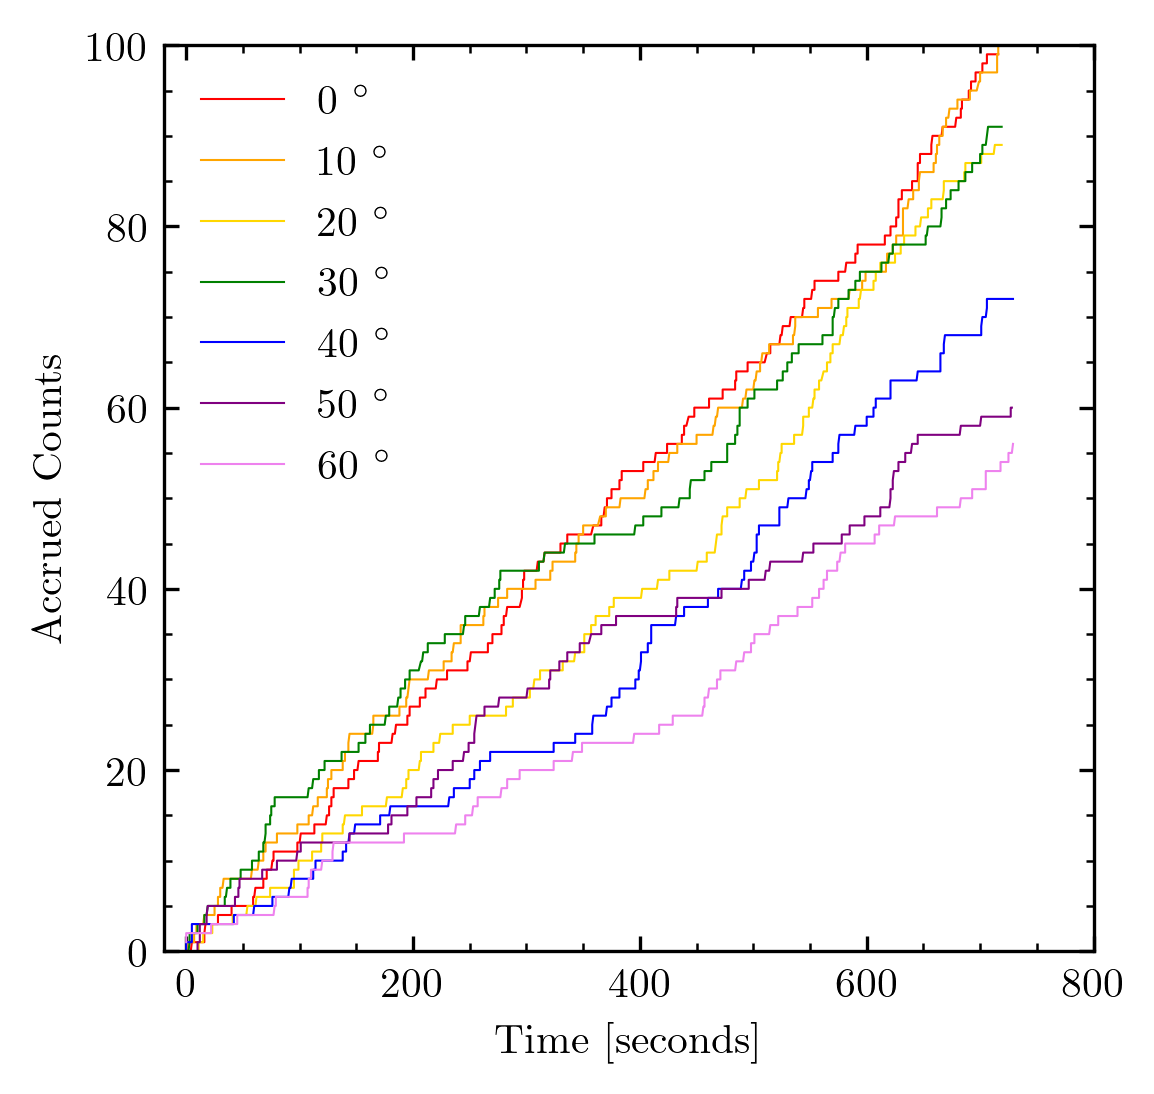

In [267]:
# all together
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(-20,800), 
                         ylim=(0,100), xlabel=('Time [seconds]'), 
                         ylabel=('Accrued Counts'))

ax.plot(times0, np.cumsum(counts0), ls='-', lw=0.5, label='0 $^{\circ}$', color='red')
ax.plot(times10, np.cumsum(counts10), ls='-', lw=0.5, label='10 $^{\circ}$', color='orange')
ax.plot(times20, np.cumsum(counts20), ls='-', lw=0.5, label='20 $^{\circ}$', color='gold')
ax.plot(times30, np.cumsum(counts30), ls='-', lw=0.5, label='30 $^{\circ}$', color='green')
ax.plot(times40, np.cumsum(counts40), ls='-', lw=0.5, label='40 $^{\circ}$', color='blue')
ax.plot(times50, np.cumsum(counts50), ls='-', lw=0.5, label='50 $^{\circ}$', color='purple')
ax.plot(times60, np.cumsum(counts60), ls='-', lw=0.5, label='60 $^{\circ}$', color='violet')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_sum_all.png')

**Plot the Cumulative Average Count Rates**

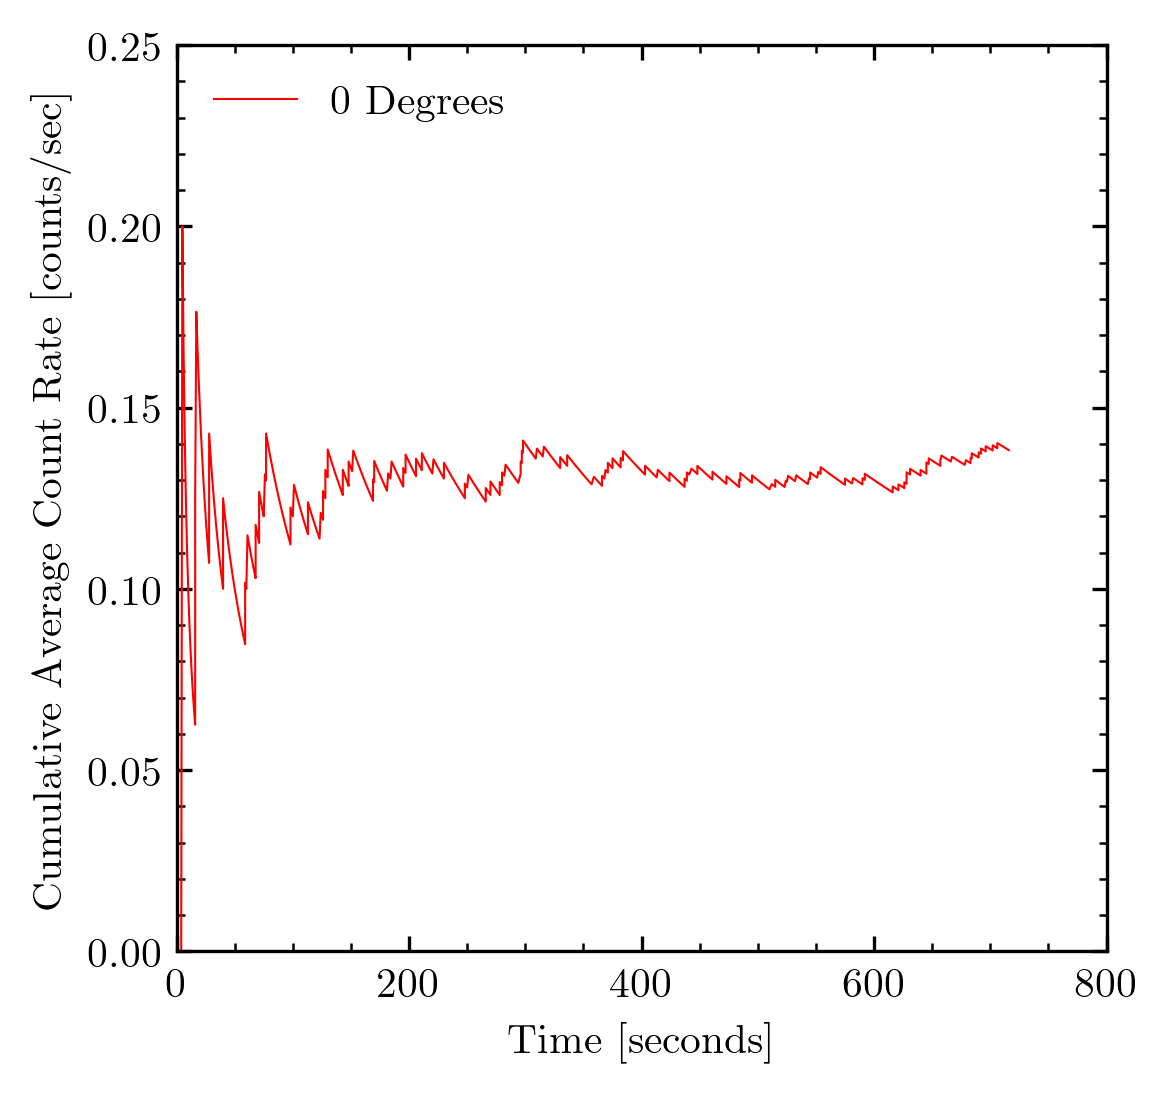

In [268]:
# 0 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.25), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Count Rate [counts/sec]'))

ax.plot(times0[4:], np.cumsum(counts0[4:])/np.array(times0[4:]), ls='-', lw=0.5, label='0 Degrees', 
        color='red')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_0.png')

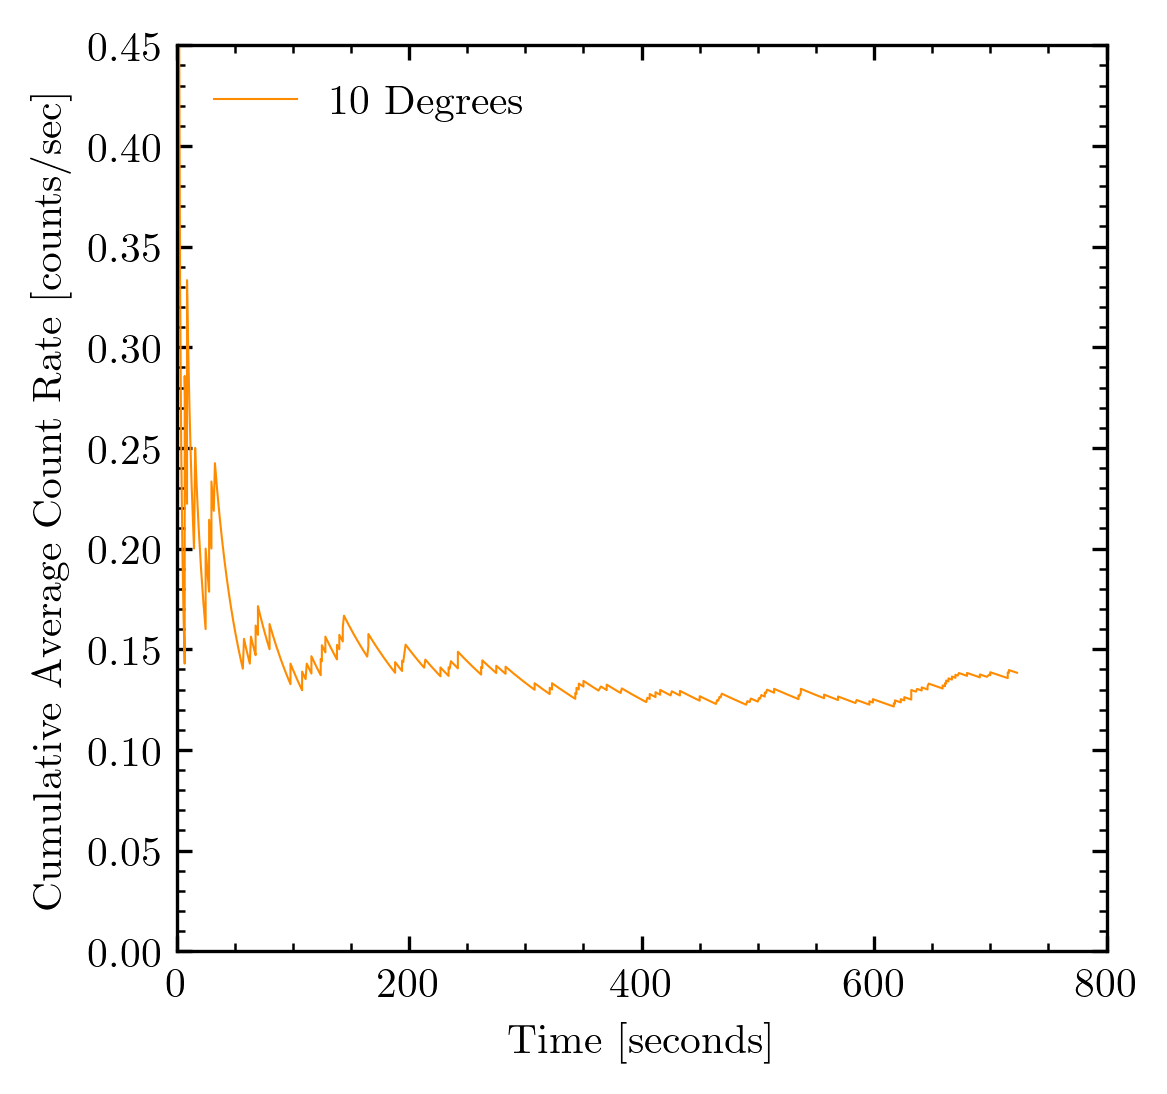

In [286]:
# 10 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.45), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Count Rate [counts/sec]'))

ax.plot(times10[5:], np.cumsum(counts10[5:])/np.array(times10[5:]), ls='-', lw=0.5, 
        label='10 Degrees', color='darkorange')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_10.png')

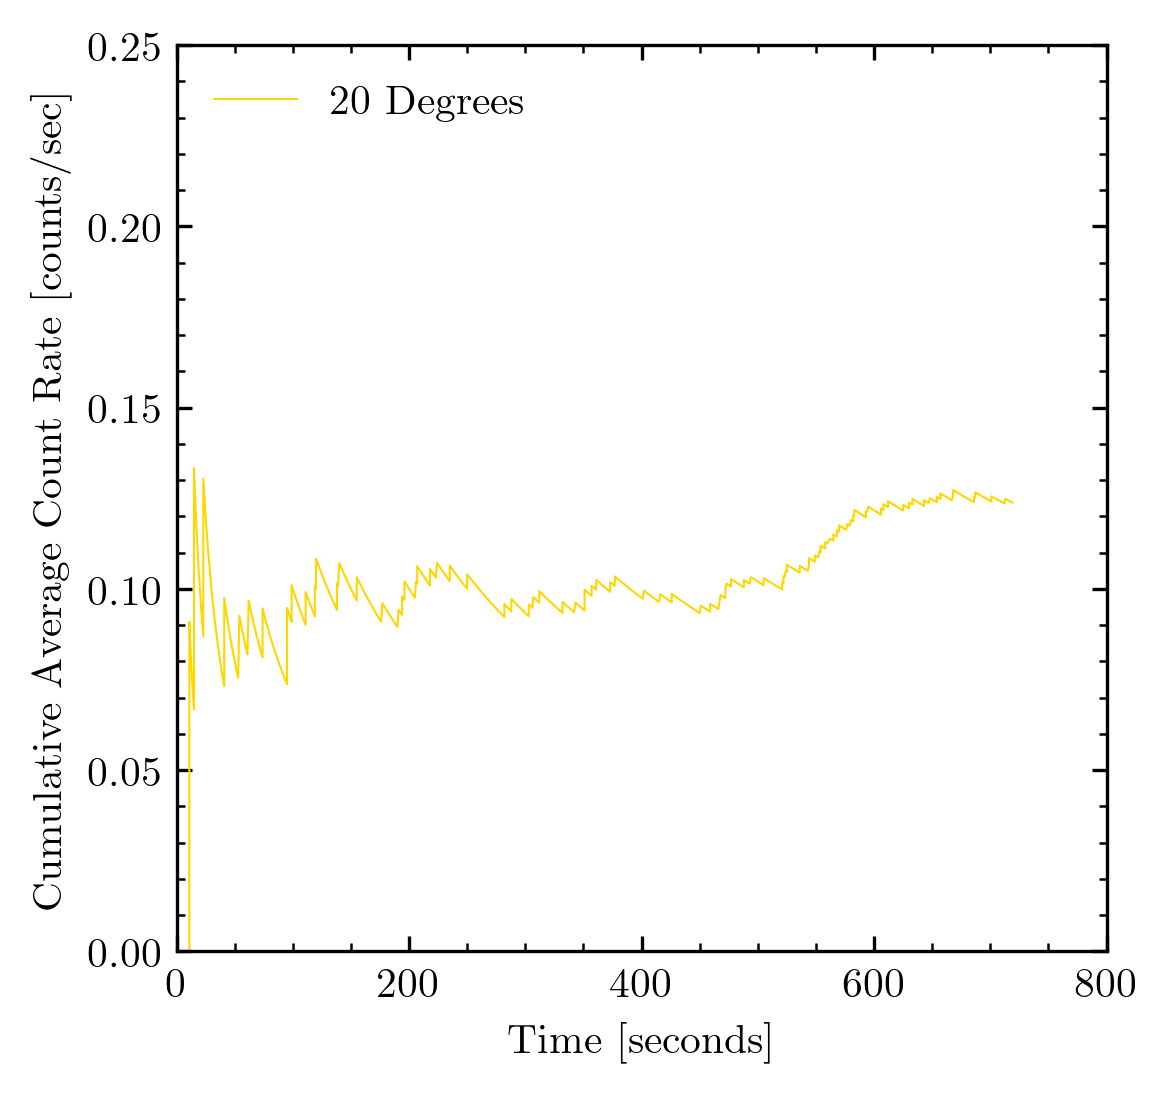

In [270]:
# 20 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.25), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Count Rate [counts/sec]'))

ax.plot(times20[3:], np.cumsum(counts20[3:])/np.array(times20[3:]), ls='-', lw=0.5, 
        label='20 Degrees', color='gold')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_20.png')

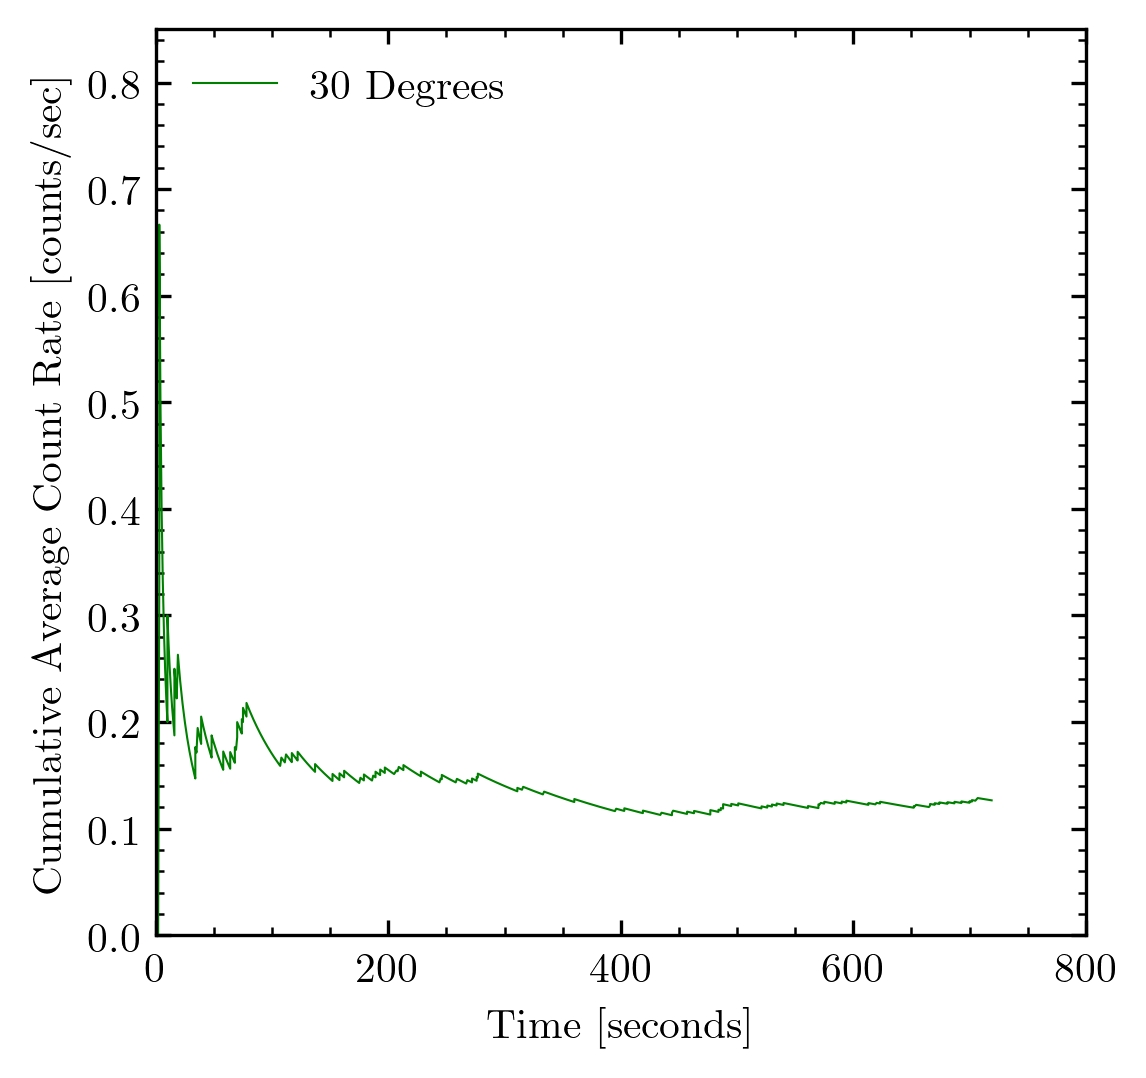

In [271]:
# 30 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.85), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Count Rate [counts/sec]'))

ax.plot(times30[1:], np.cumsum(counts30[1:])/np.array(times30[1:]), ls='-', lw=0.5, 
        label='30 Degrees', color='green')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_30.png')

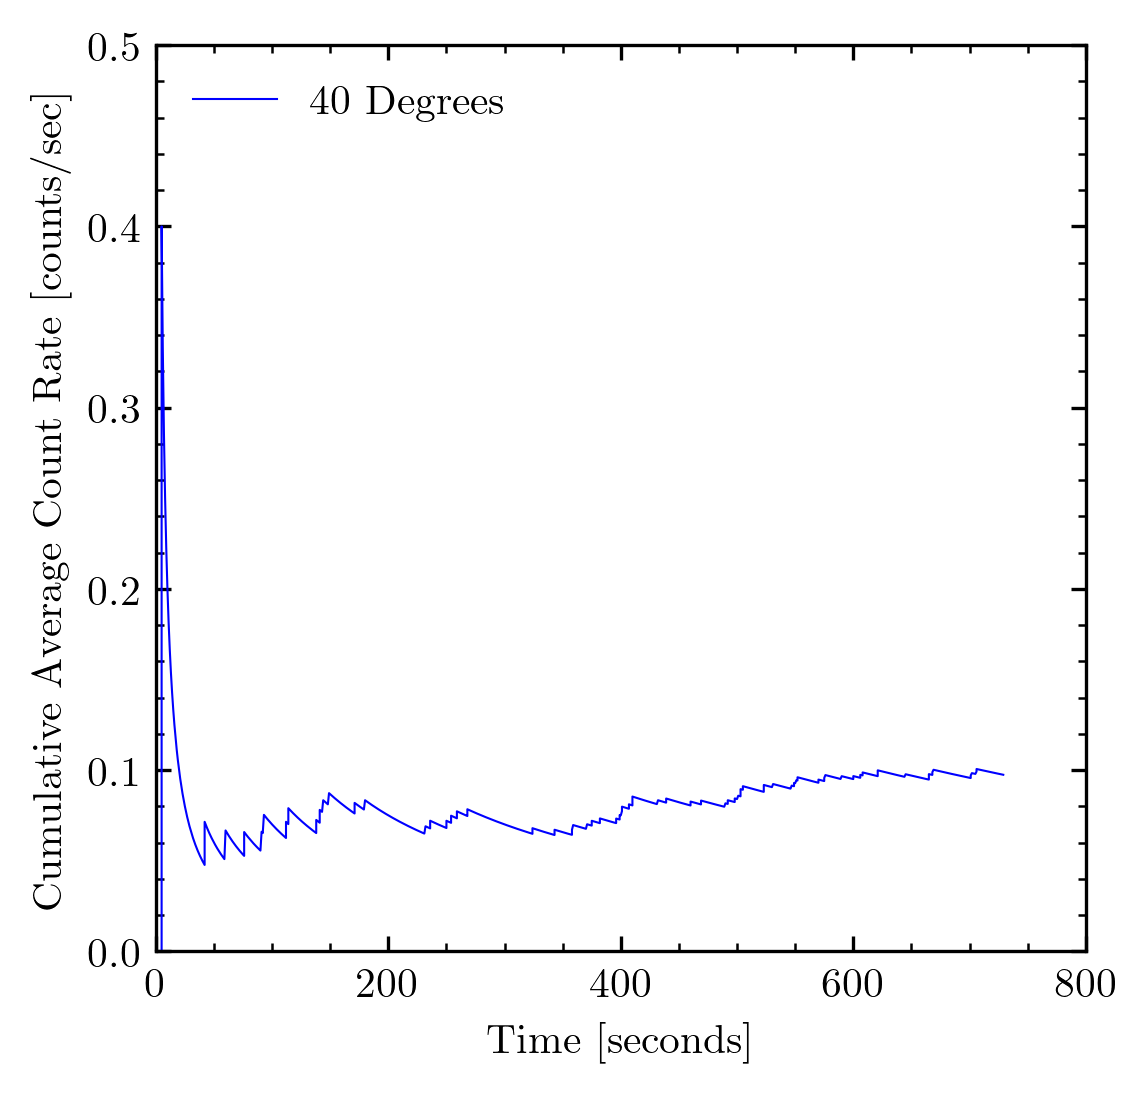

In [272]:
# 40 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.5), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Count Rate [counts/sec]'))

ax.plot(times40[3:], np.cumsum(counts40[3:])/np.array(times40[3:]), ls='-', lw=0.5, 
        label='40 Degrees', color='blue')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_40.png')

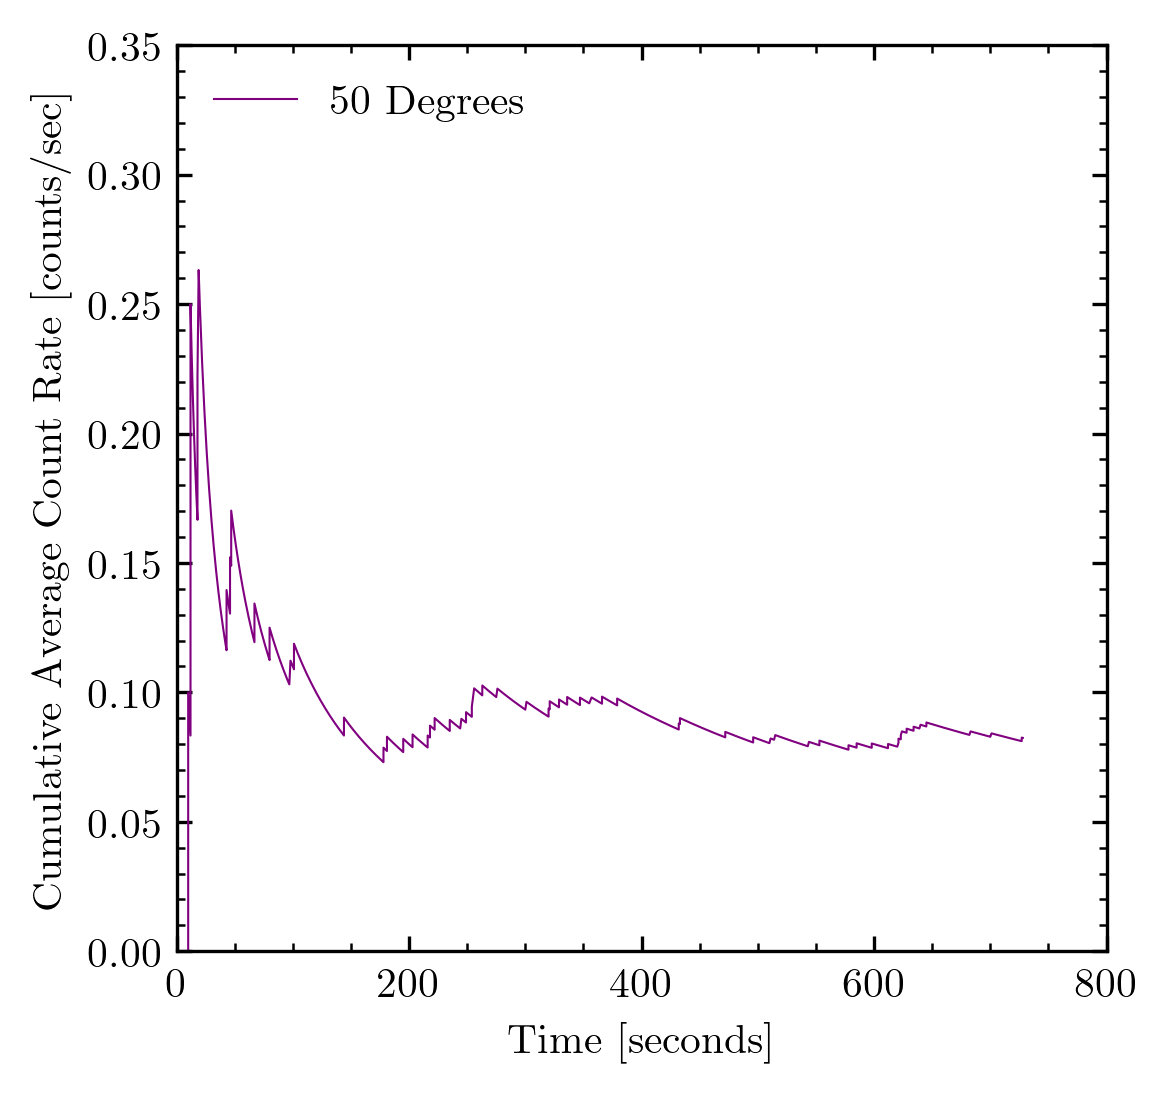

In [273]:
# 50 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.35), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Count Rate [counts/sec]'))

ax.plot(times50[2:], np.cumsum(counts50[2:])/np.array(times50[2:]), ls='-', lw=0.5, 
        label='50 Degrees', color='purple')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_50.png')

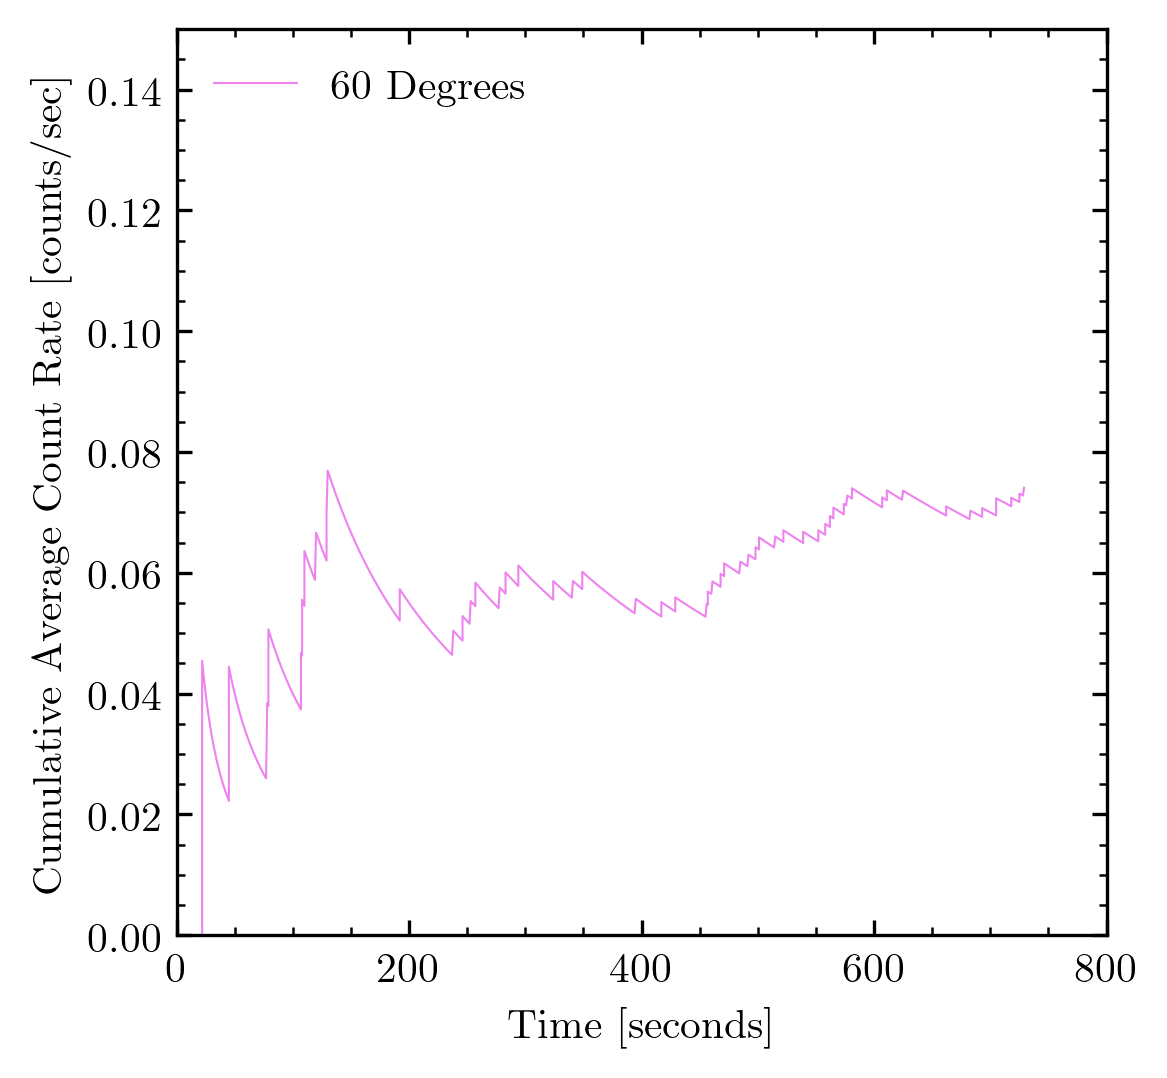

In [274]:
# 60 deg
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.15), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Count Rate [counts/sec]'))

ax.plot(times60[2:], np.cumsum(counts60[2:])/np.array(times60[2:]), ls='-', lw=0.5, 
        label='60 Degrees', color='violet')

ax.legend(loc='upper left', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_60.png')

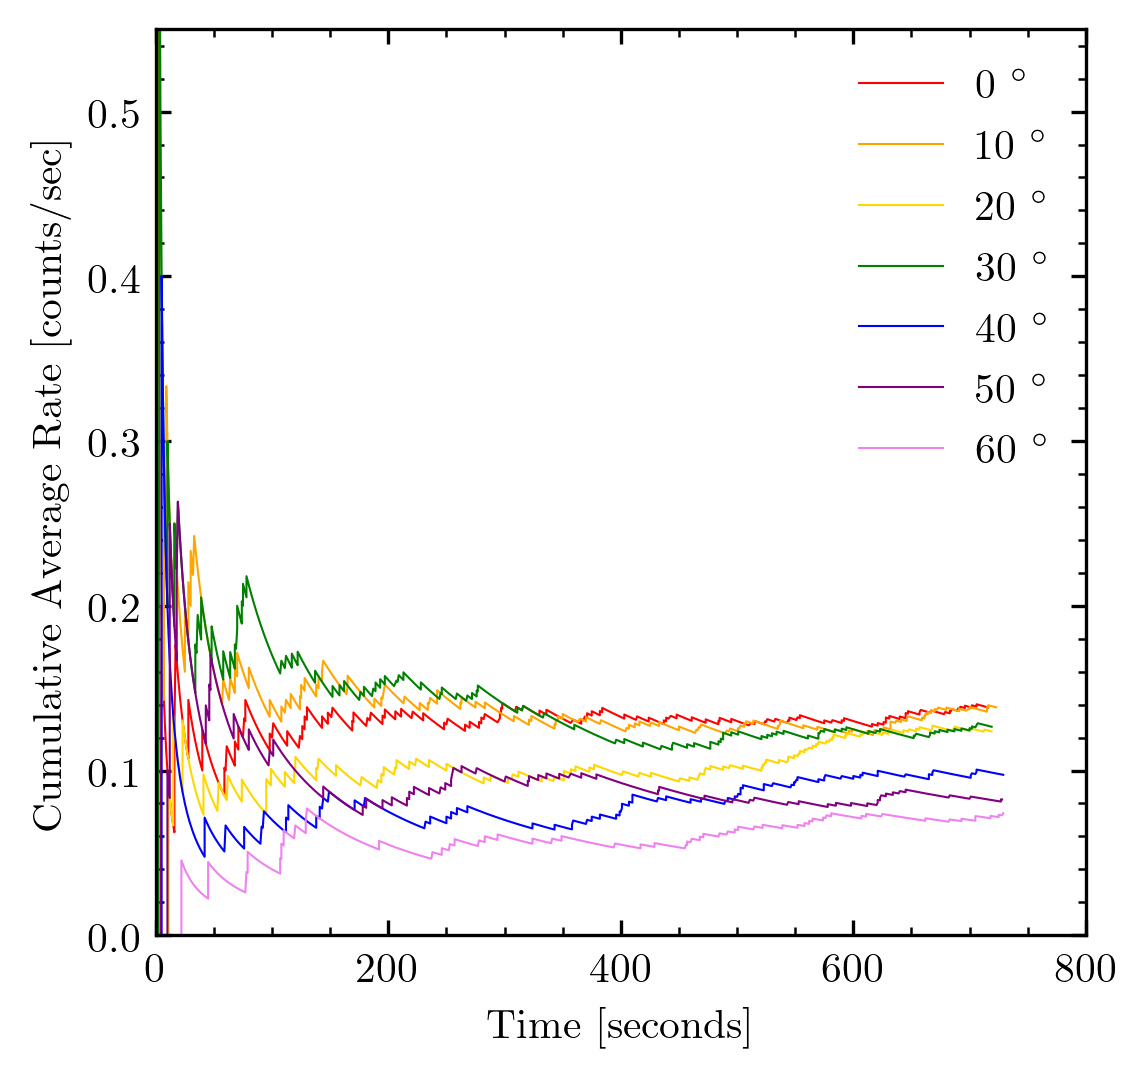

In [279]:
# all together
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,800), 
                         ylim=(0,0.55), xlabel=('Time [seconds]'), 
                         ylabel=('Cumulative Average Rate [counts/sec]'))

ax.plot(times0[4:], np.cumsum(counts0[4:])/np.array(times0[4:]), ls='-', lw=0.5, 
        label='0 $^{\circ}$', color='red')
ax.plot(times10[5:], np.cumsum(counts10[5:])/np.array(times10[5:]), ls='-', lw=0.5, 
        label='10 $^{\circ}$', color='orange')
ax.plot(times20[3:], np.cumsum(counts20[3:])/np.array(times20[3:]), ls='-', lw=0.5, 
        label='20 $^{\circ}$', color='gold')
ax.plot(times30[1:], np.cumsum(counts30[1:])/np.array(times30[1:]), ls='-', lw=0.5, 
        label='30 $^{\circ}$', color='green')
ax.plot(times40[3:], np.cumsum(counts40[3:])/np.array(times40[3:]), ls='-', lw=0.5, 
        label='40 $^{\circ}$', color='blue')
ax.plot(times50[2:], np.cumsum(counts50[2:])/np.array(times50[2:]), ls='-', lw=0.5, 
        label='50 $^{\circ}$', color='purple')
ax.plot(times60[2:], np.cumsum(counts60[2:])/np.array(times60[2:]), ls='-', lw=0.5, 
        label='60 $^{\circ}$', color='violet')

ax.legend(loc='upper right', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\cum_avg_all.png')

**Compute the Overall Average Count Rates**

In [151]:
# get nonzero masks
mask0 = (np.array(counts0) != 0)
mask10 = (np.array(counts10) != 0)
mask20 = (np.array(counts20) != 0)
mask30 = (np.array(counts30) != 0)
mask40 = (np.array(counts40) != 0)
mask50 = (np.array(counts50) != 0)
mask60 = (np.array(counts60) != 0)

In [157]:
# get the averages (katherine johnson)

# 0 deg
avg0 = np.sum(counts0)/max(times0)

# 10 deg
avg10 = np.sum(counts10)/max(times10)

# 20 deg
avg20 = np.sum(counts20)/max(times20)

# 30 deg
avg30 = np.sum(counts30)/max(times30)

# 40 deg
avg40 = np.sum(counts40)/max(times40)

# 50 deg
avg50 = np.sum(counts50)/max(times50)

# 60 deg
avg60 = np.sum(counts60)/max(times60)

In [228]:
# averages (tsung dao lee)

# 10 deg
avg10_2 = np.sum(counts10_2)/max(times10_2)

# 20 deg
avg20_2 = np.sum(counts20_2)/max(times20_2)

# 30 deg
avg30_2 = np.sum(counts30_2)/max(times30_2)

# 40 deg
avg40_2 = np.sum(counts40_2)/max(times40_2)

# 50 deg
avg50_2 = np.sum(counts50_2)/max(times50_2)

# 60 deg
avg60_2 = np.sum(counts60_2)/max(times60_2)

In [229]:
# collect into array
avgs = np.array([avg0, avg10, avg20, avg30, avg40, avg50, avg60])
avgs_2 = np.array([avg0, avg10_2, avg20_2, avg30_2, avg40_2, avg50_2, avg60_2])

In [246]:
# errors
avg_errs = np.std(avgs-avgs_2)/np.sqrt(2)

In [243]:
np.abs(avgs-avgs_2)/np.sqrt(2)

array([0.00000000e+00, 1.47434701e-03, 0.00000000e+00, 0.00000000e+00,
       9.71317201e-04, 7.99424299e-05, 2.90990445e-03])

In [239]:
np.std(avgs-avgs_2)

0.0016774306005377599

In [240]:
avgs

array([0.13826816, 0.13831259, 0.12378303, 0.12656467, 0.09876543,
       0.08241758, 0.07681756])

In [242]:
avgs_2

array([0.13826816, 0.13622754, 0.12378303, 0.12656467, 0.10013908,
       0.08230453, 0.07270233])

Get the Angles

In [181]:
angles = [0, 10, 20, 30, 40, 50, 60]
angle_errs = [1, 1, 1, 1, 1, 1, 1]

# convert to radians
thetas = np.array(angles)*np.pi/180
theta_errs = np.array(angle_errs)*np.pi/180

In [182]:
thetas

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755])

In [220]:
np.std(avgs)

0.02396810952349149

In [183]:
theta_errs

array([0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
       0.01745329, 0.01745329])

Plot the Average Count Rates versus Angle

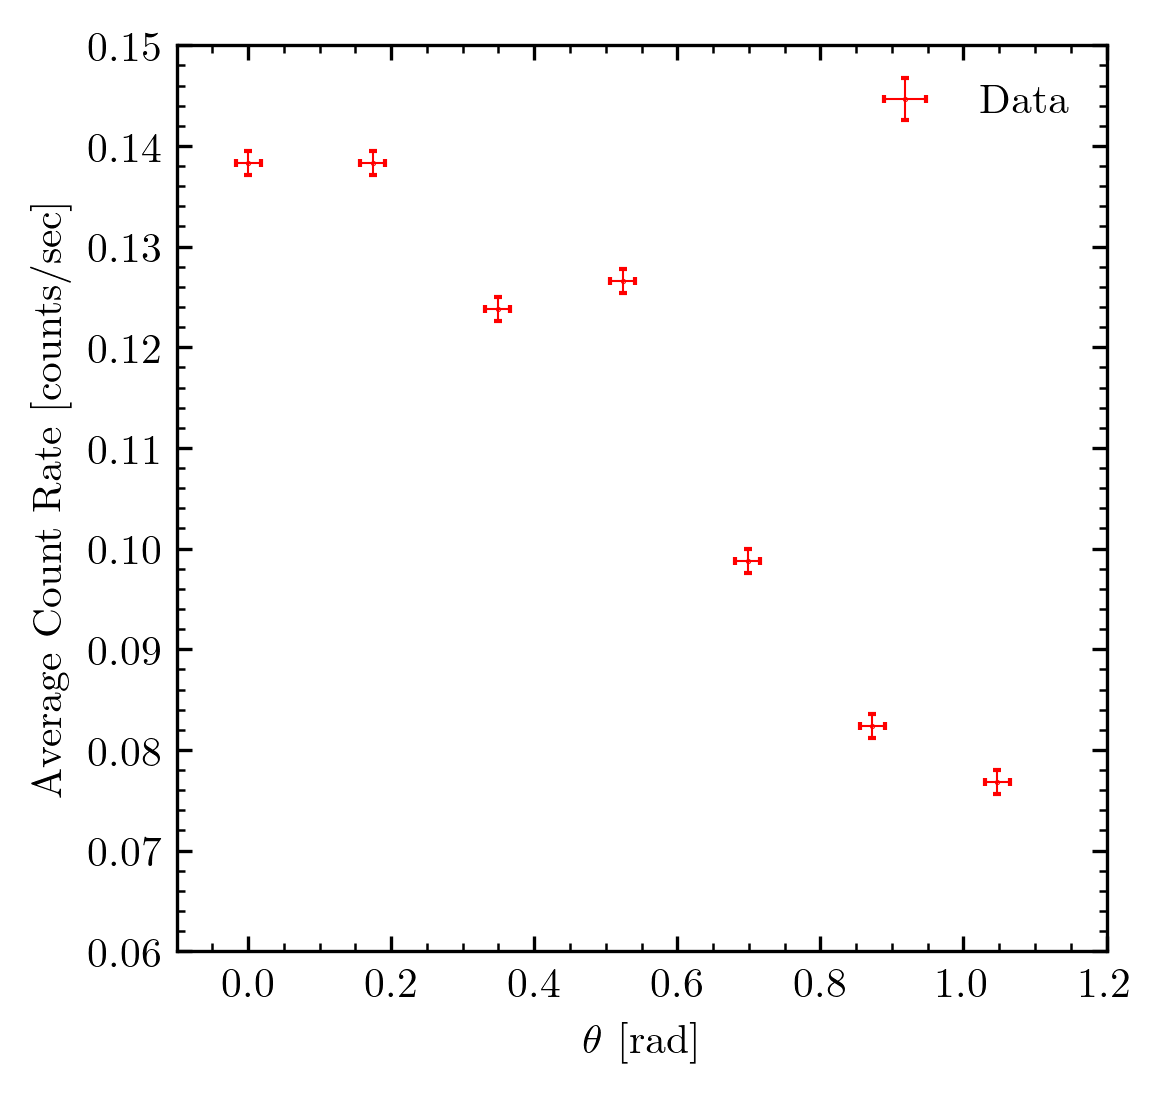

In [288]:
# bare
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(-0.1,1.2), 
                         ylim=(0.06,0.15), xlabel=(r'$\theta$ [rad]'), 
                         ylabel=(r'Average Count Rate [counts/sec]'))

ax.errorbar(thetas, avgs, xerr=theta_errs, yerr=avg_errs, ls='None', elinewidth=0.5, capsize=1, capthick=1, 
            marker='.', ms=0.5, label='Data', color='red')

ax.legend(loc='upper right', frameon=False, numpoints=1)

save = True
if save:
    plt.savefig(dir_plot + '\\rate_vs_theta.png')

In [174]:
avgs

array([0.13826816, 0.13831259, 0.12378303, 0.12656467, 0.09876543,
       0.08241758, 0.07681756])

Create a Fit Model for the Data

In [186]:
def angle_func(x, a, b):
    return a*np.cos(b*x)**2

In [185]:
# fit function
def angle_fit(thetas, rates, errs, a, b):
    popt, pcov = curve_fit(angle_func, thetas, rates, sigma=errs, p0 = [a,b], 
                       absolute_sigma = True)
    return popt, pcov

In [187]:
# chi squared function
def chisq(func,popt,x,y,sig):
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

In [250]:
# do the fit
popt, pcov = angle_fit(thetas, avgs, [avg_errs]*7, a=0.14, b=0.5)

In [251]:
popt

array([0.13791121, 0.73665542])

In [253]:
chi = chisq(angle_func, popt, thetas, avgs, avg_errs)

In [254]:
chi

145.66507345296088

Plot the Fit Funtion on top of the Data

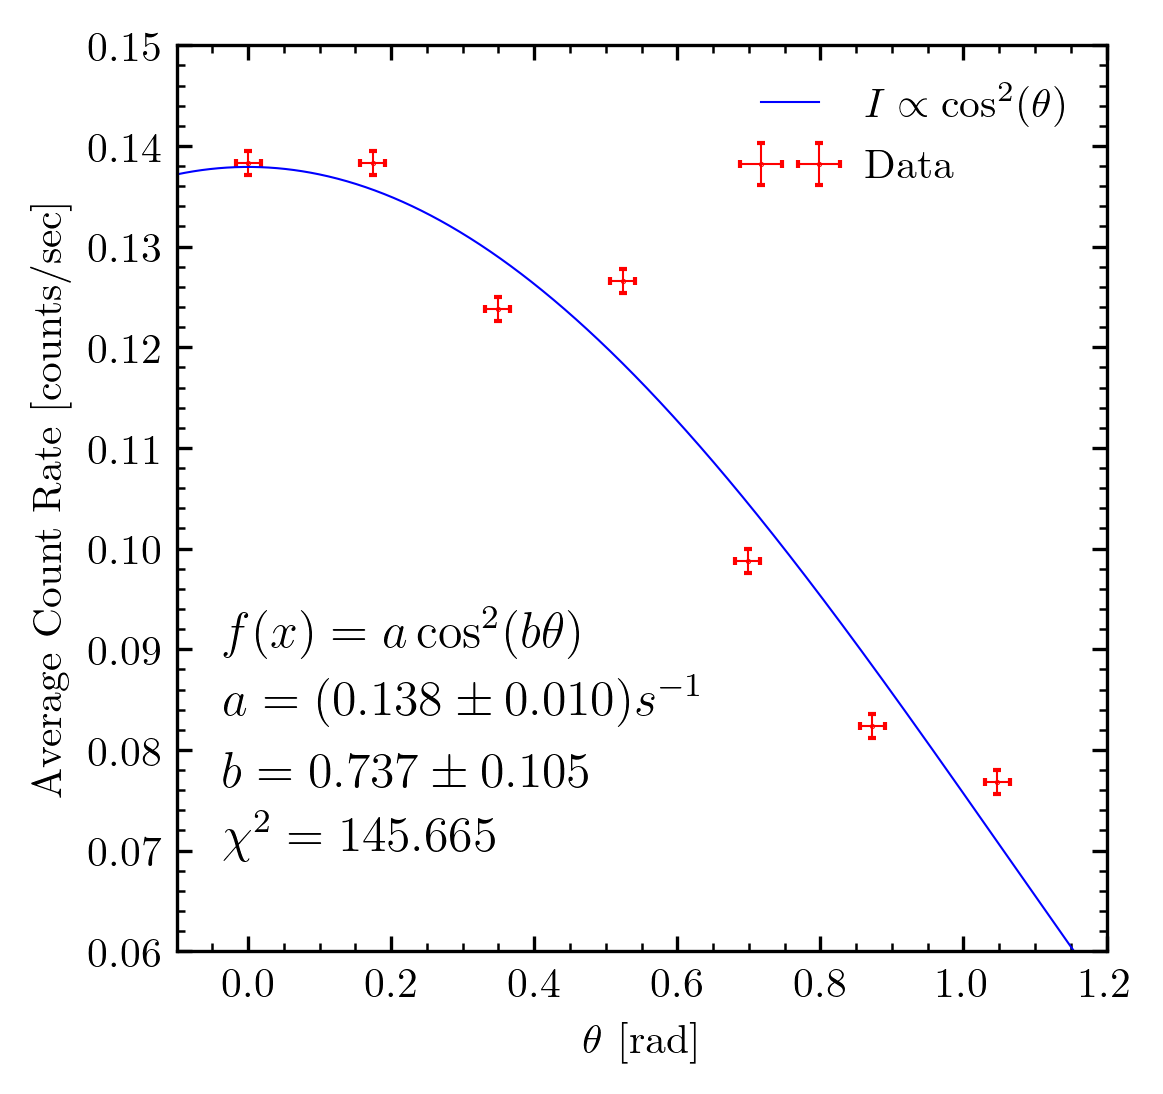

In [295]:
# bare
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(-0.1,1.2), 
                         ylim=(0.06,0.15), xlabel=(r'$\theta$ [rad]'), 
                         ylabel=(r'Average Count Rate [counts/sec]'))

# data
ax.errorbar(thetas, avgs, xerr=theta_errs, yerr=avg_errs, ls='None', elinewidth=0.5, capsize=1, capthick=1, 
            marker='.', ms=0.5, label='Data', color='red')

# fit
x = np.linspace(-0.1, 1.2, 1000)
ax.plot(x, angle_func(x, *popt), ls='-', lw=0.5, color='blue', 
        label=r'$I\propto \cos^{2}(\theta)$')

ax.legend(loc='upper right', frameon=False, numpoints=2)

modplot.stamp(ax=ax, left_x=0.05, top_y=0.35, textops_update={'fontsize':12},
             line_0 = r'$f(x)=a\cos^{2}(b \theta)$',
             line_1 = '$a=(0.138\pm 0.010) s^{-1}$', 
             line_2 = '$b=0.737\pm 0.105$', 
             line_3 = '$\chi^{2}=145.665$')

save = True
if save:
    plt.savefig(dir_plot + '\\rate_vs_theta_fitted.png')

Normalize the Above Data

In [198]:
np.sqrt(np.diag(pcov))

array([0.01003576, 0.10499359])

In [199]:
popt

array([0.13791121, 0.73665541])

Create a theoretical Model

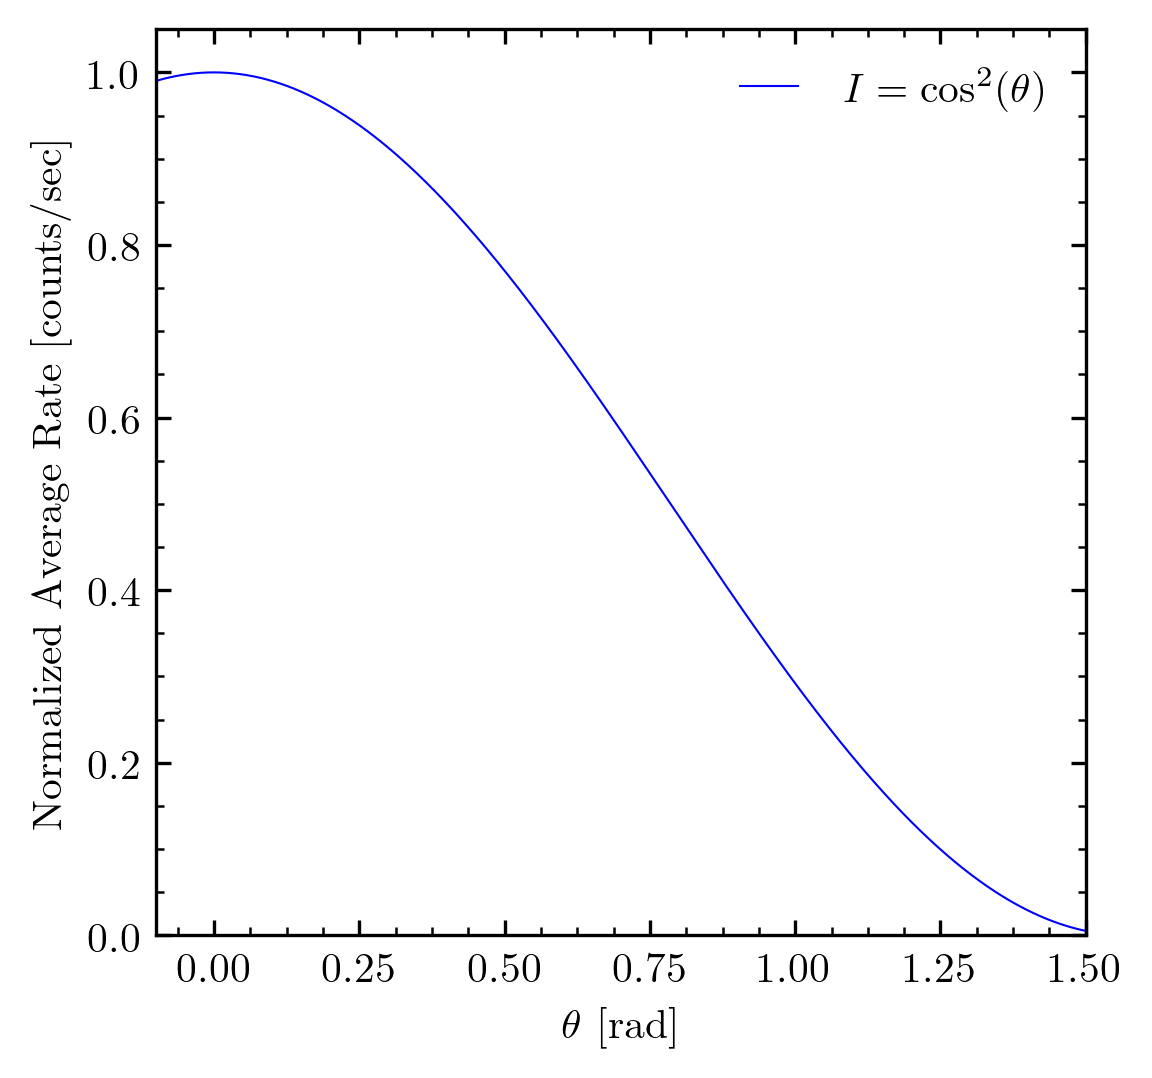

In [294]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(-0.1,1.5), 
                         ylim=(0.00,1.05), xlabel=(r'$\theta$ [rad]'), 
                         ylabel=(r'Normalized Average Rate [counts/sec]'))

# Model
x = np.linspace(-0.1, 1.5, 1000)
ax.plot(x, angle_func(x, 1, 1), ls='-', lw=0.5, color='blue', 
        label=r'$I=\cos^{2}(\theta)$')

ax.legend(loc='upper right', frameon=False, numpoints=2)

save = True
if save:
    plt.savefig(dir_plot + '\\theor_avg_vs_theta.png')